<a href="https://colab.research.google.com/github/geocarvalho/uni-proj/blob/master/IF699/cleber/6-SVM.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Support Vector Machines (SVMs)

* Considere um conjunto de *n* pontos $x_i$ (i=1, ..., n) pertencentes a duas classes {+1, -1} linearmente separáveis;

* Um classificador pode ser construído a partir de um hiperplano de separação $x.w + b = 0$

> Se $x_i.w + b > 0$, então $y_i = +1$;

> Se $x_i.w + b < 0$, então $y_i = -1$;

> Ou $y_i = sign(x_i.w + b)$

* Existem infinitos hiperplanos que separam dois conjuntos de pontos linearmente separáveis. Qual o melhor?

> Menor erro de classificação e maior **margem**.

* Hiperplano ótimo é equidistante às classes e maximiza a **margem** de separação;

![slide7](slide7.png)

* Pontos mais próximos do hiperplano ótimo são chamados de **vetores de suporte**;

* Hiperplanos **superior** e **inferior** podem ser reescalados para: $x.w + b = +1$ e $x.w + b = -1$

> Margem 2d é calculada como $\frac{2}{|w|}$

![2d](2d.png)

## Considerando:

* Dados de treinamento: tuplas no formato ($x_1, x_2, ..., x_n, y$), atributos $x_i$ e classe $y$ (+1, -1)

* Conjunto dito linearmente separável, se existir um hiperplano H (no espaço de entrada) que separe as tuplas de classes diferentes;

* Determinar os **vetores de suporte**, encontrar o **hiperplano** ótimo (com maior **margem**)

* Considerando os vetores de suporte $x_1$ e $x_2$ temos que a distância entre um hiperplano que toca todos os vetores de suporte do lado de $x_1$ respeitando $w.x + b = +1$, equanto todos os vetores de suporte do lado de $x_2$ respeitam $w.x + b = -1$. Assim, a diferença entre ambas as funções define a **margem** $w.(x_1 - x_2) = 2$

> Logo a diferença entre $x_1$ e $x_2$ é dada por $x_1 - x_2 = \frac{2}{w}$

![x1_x2](x1_x2.png)

* Como buscamos pela máxima margem ou distância projetada entre $x_1$ e $x_2$, buscamos maximizar $d = x_1 - x_2 = \frac{2}{|w|}$. Sendo a **distância mínima** entre o hiperplano separador e os dados de treinamento dada por $\frac{1}{|w|}$. Logo, podemos maximizar esse termo ou o $|w|$ apenas.

## Hiperplano ótimo

* Aquele que possui a **maior margem** e **menor $|w|$**;

* Determinação do hiperplano:
> 1. Problema de otimização restrita;
> 2. Minimizar uma função de custo (produto interno) sujeito a restrições;
> 3. Multiplicadores de *Lagrange*

## Multiplicadores de *Lagrange*

* Empregado para resolver problemas de extremos sujeitos a restrições de igualdade;

* Para $max(min)f(x)$ 

s.a. $g_i(x) = 0, i=1, ..., N$

> Onde $f$ e $g_i(i=1,...,N) são funções reais de $n$ ($n > N$) variáveis que se assumem duas vezes diferenciáveis num determinado conjunto D.

> Função de *Lagrange*: $L(x,?) = f(x) + \sum^N_{i=1}\lambda_ig_i(x)$

* Minimizar: $L_p = \frac{1}{2}||w||^2 - \sum_i \alpha_i \times [y_i(x_i \times w + b) -1]$

> $L_p$ deve ser minimizada com respeito a $w$ e $b$ e maximizada com respeito a $\alpha_i$:

$max_{\alpha}{min_{w,b} {L_p(w,b,\alpha)}}$

onde $\frac{\partial L_p}{\partial w}\ =\ 0\ \to\ w\ =\ \sum_i\alpha_ix_iy_i$

e $\frac{\partial L_p}{\partial b}\ =\ 0\ \to\ w\ =\ \sum_i \alpha_i y_i$

teremos um novo problema de otimização, maximizar:

$L_D = \sum_i \alpha_i - \sum_{i,j} \alpha_i \times \alpha_j \times x_i \times x_j \times y_i \times y_j$

> Os vetors $x_i$ e $x_j$ são o vetor de entrada e o padrão de entrada pertecente ao j-ésimo exemplo;

> Problema resolvido comumente por métodos de otimização quadrática (SMO) - solução **única e ótima**

> Existe um $\alpha_i$ para cada exemplo de treinamento. Na solução ótima de $L_D, \alpha_i > 0$ para os vetores de suporte e $\alpha = 0$ para os outros exemplos;

> O hiperplano ótimo depende apenas dos vetores suporte;

> Maximizando $L_D$ o hiperplano ótimo é obtido diretamente: $w = \sum_i \alpha_i x_i y_i$

$b = 1 - w \times x_{(s)}$ onde $x_{(s)}$ é um vetor suporte no hiperplano superior.

## SVM *softmargin*

* A formulação anteriormente definida é para conjuntos linearmente separáveis (*Hard Margin SVM*)

* Para conjuntos não-linearmente separáveis pequenos erros podem ser tolerados

> Minimizar $\frac{||w||^2}{2} + C \sum_i \xi_i$, sujeito a $y_i(x_i.w + b) - 1 + \xi_i >= 0$

* A derivação do *Lagrangiano* introduz apenas uma restrição para $\alpha_i$

$L_D = \sum_i \alpha_i - \sum_{i,j} \alpha_i \times \alpha_j \times x_i \times x_j \times y_i \times y_j$

$0 \leq \alpha_i \leq C$ - valores de $\alpha_i$ limitados pelo parâmetro de complexidade C.

## SVM não-linear

* SVM linear ainda é muito limitado mesmo com margens flexíveis;

* Generalização não-linear de SVM: Mapear espaço original para espaço não-linear de maior dimensão onde exemplos sejam linearmente separáveis;
> Construir **hiperplano ótimo** no novo espaço.

## Problema

* Como escolher a função $\Phi (x)$ (transformação) tal que o espaço de características transformado seja eficiente para classificação e não possua custo computacional alto demais?
> Com uma função especial, chamada de **função kernel** é possivel calcular o produto escalar $\Phi (x_i) \times \Phi (x_j)$ sem mesmo conhecer o mapeamento $\Phi$.

* Em SVM não-lineares, pontos são mapeados implicitamente através da função kernel, sendo essa função um produto escalar de vetores em algum espaço: $K(x_i, x_j$ = \Phi(x_i) \times \Phi(x_j)$

## *The kernel trick*

* Parece ingênuo mas pode transformar quaisquer algoritmos lineares que possam ser expressos em termros de produtos internos sem algoritmos não-lineares;

* Incrementar o número de dimensões do espaço;

* Incrementar muito! Mover o problema para um espaço em que exista uma dimensão independente para cada uma das possíveis entradas de sua função!

* O classificador linear depende do produto interno entre exemplos: $K(x_i, x_j) = x_i^{\top}x_j$

* Se cada ponto for mapeado para um espaço de alta dimensão através de uma transformação $\Phi: x \to \varphi(x)$, o produto interno fica: $K(x_i, x_j) = \varphi(x_i)^{\top}\varphi(x_j)$

* Uma função de kernel é uma função que é equivalente a um produto interno em um espaço de maior demensionalidade;

* Para algumas funções kernel provar que o espaço de transformação existe pode ser difícil. Por construção usando propriedades matemáticas como o Teorema de Mercer é possível.
> Toda função simétrica definida semi-positiva é um kernel.

* "O desempeho destes métodos é extremamente dependente da seleção e projeto das funções de kernel utilizadas";

* "Embora kernels mais gerais apresentem desempenho satisfatório, kernels específicos para diferentes representações de dados pode melhorar bastante os resultados obtidos";

* Não é necessário difinir explicitamente o mapeamento $\Phi$ (alguns casos é impossível). Todo o treinamento e uso do modelo são realizados apenas usando o kernel;

## Funções de kernel mais usadas

* Polinomial

$K(a,b) = (1 + \sum_j a_j b_j)^d$

* Função de base radial

$K(a,b) = exp(\frac{-(a-b)^2}{2\sigma^2}$

* Saturada próximo de uma sigmóide

$K(a,b) = tanh(ca^{\top}b + h)$

* Outros, dependendo do tipo de dado: similaridade de string para texto, algoritmos genéticos, etc.

## SVM para múltiplas classes

* Uma versos todas: Treina $n$ classificadores binários, um para cada classe contra todas as outras;

* Uma versos uma: Treina $\frac{n(n-1)}{2}$ classificadores, cada um discrimando entre um par de classes. Várias estratégias para seleciona a classificação final se baseando na saída do SVM binário;

* SVMs multiclasses: Generaliza a formulação do SVM para multiplas categorias.

## Seleção de modelos

* A escolha do kernel é importante para o desempneho das SVMs. Dependendo do kernel utilizado alguns parâmetros devem ser definidos, parâmetros de complexidade C é um dos aspectos importantes;

* O Kernel **RBF** é mais flexível que o polinomial, ele depende do parâmetro $\gamma$;
> Valores altos dão maior flexibilidade ao modelo mas também aumentam o risco de overfitting.

* Sobre o parâmetro **C**: valores muito altos propiciam a geração de modelos mais complexos (risco de overfitting), já valores menores podem aumentar o risco de underfitting.

* *Grid-search* separa o conjunto de treinamento e teste. Com o conjunto de treinamento se realiza a validação cruzada para encontrar os melhores valores para $C$ e $\gamma$. Depois se retreina com o melhor par encontrado e se testa nos dados de teste após o treinamento.

## Otimização RNA versos SVM

* RNA: mínimo local - Definir a quantidade de neurônios na camada intermediária;

* SVM: mínimo global - Definir o melhor parâmetro $C$ (custo);

## Comentários

* SVM se situa dentre as técnicas de aprendizado mais poderosas, baseada em uma teoria matemática forte. É justificável teoricamente e com bom desempenho empírico;

* Apesar de ter poucos parâmetros para selecionar (função kernel), a escolha adequada é importante;

* A maior desvantagem é o tempo de treinamento e uso (dependendo da quantidade de classes).

---

# Capítulo 26 - Máquinas de vetores de suporte (Support Vector Machines - SVM)

## 26.1 Classificador de margem-máxima

* O classifidor de margem-máxima é um classificador hipotético que explica muito bem como SVM funciona na prática. As variáveis numéricas de entrada ($x$) nos seus dados (colunas) formam um espaço n-dimensional. Por exemplo, se você tem duas variáveis de entrada, isso formaria um espaço bidimensional;

* Um hiperplano é uma linha que divide as variáveis de entrada num espaço. Em SVM, um hiperplano é selecionado para melhor separar os pontos das variáveis de entrada num espaço pela sua classe, classe 0 ou classe 1. Em um espaço bidimensional é possível visualizar isso como uma linha e vamos assumir que todos os pontos de entrada podem ser completamente separáveis por uma linha;

* Por exemplo $b_0 + (b_1 \times x_1) + (b_2 \times x_2) = 0$

> Onde os coeficientes ($b_1$ e $b_2$) que determinam a inclinação da linha e a interceptação ($b_0$) são encontrados pelo algoritmo de apredizagem, sendo $x_1$ e $x_2$ as duas variáveis de entrada;

> Classificações podem ser feitas usando essa linha, basta introduzir os valores de entrada na equação da linha que é possível calcular um novo ponto acima ou abaixo da linha.

* Abaixo da linha, a equação retorna um valor maior que zero e o ponto pertence a primeira classe (classe 0). Acima da linha, a equação retorna um valor menor que zero e o ponto pertence a segunda classe (classe 1). Já um valor próximo da linha retorna um valor perto de zero e o ponto pode ser difícil de classificar. Se a magnitude do valor é grande, o modelo pode mais confiabilidade na predição.

* A distância entre a linha e os dados mais próximos é referenciada como **margem**. A melhor linha ou linha ótima que pode separar duas classes é a linha com a **maior margem** (hiperplano de margem-máxima);

* A margem é calculada como a distância perpendicular da linha para os pontos mais próximos. Apenas esses pontos são relevantes na definição da linha e a construção do classificador, esses pontos são chamados de **vetores de suporte**, eles suportam ou definem o hiperplano. O hiperplano é aprendido pelo dados de treinamento usando um processo de otimização que **maximiza** a margem.

## 26.2 Classificador de margem suave

* Ná prática, dados reais são bagunçados e não podem ser separados por um hiperplano. A restrição de maximizar a margem da linha que separa as classes deve ser relaxada, isso é normalmente chamado de **classificador de margem suave**;

* Essa mudança permite que alguns pontos nos dados de treinamento violem a linha de separação. Um grupo adicional de coeficientes são introduzidos dando a margem espaço de manobra em cada dimensão. Esses coeficientes são chamados de variáveis de folga. Isso aumenta a complexidade do modelo havendo mais parâmetros para o modelo caber (*fit*) nos dados e fornecer essa complexidade;

* Um parâmetro de afinação $C$ define a magnitude da flexibilidade permitida entre as dimensões. O parâmetro $C$ define a quantidade de violações na margem que são permitidas. Um $C = 0$ significa sem violação e voltamos a inflexibilidade do classificado de margem-máxima descrito anteriormente. Quanto maior o valor de $C$, mais violações no hiperplano são permitidas. Durante o aprendizado do hiperplano a partir dos dados, todas as instâncias de treinamento que estão entre a distância da margem irão afetar o posicionamento do hiperplano e são referidos como **vetores de suporte**. E como $C$ afeta o número de instâncias que permitem cairem dentro da margem, $C$ influencia o número de vetores de suporte usados pelo modelo.

> Quanto **menor** o valor de $C$, **mais sensível** o algoritmo é aos dados de treinamento (**maior variância** e **menor viés**);

> Quanto **mair** o valor de $C$, **menos sensível** o algoritmo é aos dados de treinamento (**baixa variância** e **maior viés**)

## 26.3 Máquinas de suporte de vetores - SVMs (Kernels)

* O algoritmo de SVM é implementado na prática usando um *kernel*. O aprendizado do hiperplano numa SVM linear é feito pelo aprendizado do problema usando algebra linear. Um ideia poderosa é que o SVM linear pode ser reformulado usnado o produto interior que qualquer duas observações, em vez das observações diretas;

* O produto escalar entre dois vetores é a soma da multiplicação de cada par de valores de entrada. Por exemplo, o produto escalar dos vetores $[2, 3]$ e $[5, 6]$ é $2 \times 5 + 3 \times 6$ ou $28$. A equação para fazer a predição para um novo dado de entrada usando o produto escalar entre a entrada ($x$) e cada vetor de suporte ($x_i$) é calculada por:

$f(x) = b_0 + \sum^n_{i=1} (a_i \times (x \times x_i))$

* Essa é uma equação que envolve calcular o produto escalar de um novo vetor de entrada ($x$) com todos os vetores de suporte nos dados de treinamento. O coeficiente $b_0$ e $a_i$ (para cada entrada) devem ser estimados dos dados de entrada pelo algoritmo de aprendizado.

## 26.3.1 SVM *kernel* linear

* O produto escalar é chamado de *kernel* e pode ser reescrito como: $K(x,x_i) = \sum(x \times x_i)$

* O *kernel* define a similaridade ou a medida da distância entre um novo dado e os vetores de suporte. O produto escalar é a medida de similaridade usada no SVM linear ou *kernel* linear porque a distância é a combinação linear dos dados de entrada. Outros *kerneis* podem ser usados para transformar o espaço de entrada em dimensões maiores (chamado de **truque do kernel**) como o **kernel polinomial** e o **kernel radial**.
> É desejável usar *kerneis* mais complexos quando se é necessário mais linhas para separar classes que são curvas ou mais complexas, isso pode gerar classificadores mais acurados.

## 26.3.2 SVM *kernel* polinomial

* Em vez do produto escalar, podemos usar o *kernel* polinomial:

$K(x,x_i) = 1 + \sum(x \times x_i)^d$

* Onde o grau do polinômio pode ser especificado manualmente para um algortimo de aprendizagem. Quando $d = 1$ é o mesmo que um *kernel* linear, o *kernel* polinomial permite linhas curvaos no espaço de entrada.

## 26.3.3 SVM *kernel* radial (RBF)

* Finalmente, podemos ter o kernel radial mais complexo:

$K(x,x_i) = e^{-gamma \times \sum ((x-x_i)^2)}$

* Onde $gamma$ é o parâmetro que deve ser especificado ao algoritmo de aprendizado. Um bom valor padrão de $gamma$ é 0.1, onde $gamma$ é frequentemente $0 < gamma < 1$;

* O *kernel* radial é bem local e pode criar regiões complexas no espaço da *feature*, como aproximações de poligonos num espaço bidimensional.

## 26.4 Como aprender um modelo SVM

* O modelo SVM precisa ser resolvido unado um processo de otimização. Pode ser usado um processo de otimização numérica para pesquisar pelos coeficientes do hiperplano, isso é ineficiente e não é método mais utilizado nas implementações de SVM como o LIBSVM;

* Se for implementar SVM como exercício, pode-se usar uma variação do gradiente descedente chamado **sub-gradiente descedente**;

* Existem processos de otimizações especiais que reformulam o problema de otimização para ser um problma de **progamação quadrática**. O método mais popular de SVM é o de **otimização sequencial mínimo** (*Sequencial Minimal Optimization - SMO) que é muito eficient, ele quebra o problema em sub-problemas que podem ser resolvidos analiticamente (por calculo) em vez de numericamente (pesquisando ou otimizando).

## 26.5 Preparando os dados para o modelo de SVM

* Algumas sugestões:
> 1. **Entradas numéricas**: SVM assume que os dados de entrada são numéricos, se você tem dados categoricos é preciso converter em uma variável para cada categoria (*binary dummy variables*);
> 2. **Classificação binária**: SVM básica é descrita para uma problema de classificação binária (duas classes). Porém, extensões podem ser desenvolvidas para problemas de regressão e classificação de multiclasses.

---

# Capítulo 27 - tutorial de SVM

* SVM é um algoritmo de aprendizado de máquina flexivel não-paramétrico;

* Vamos ver o algoritmo de SVM com o kernel usando sub-gradiente descendente;

* Os dados de exemplo foi criado para que as classes fossem linearmente separáveis. Isso significa que uma linha reta pode ser desenhada para separar as classes. Isso foi intensional para que fosse explorado como implementar uma SVM com um kernel linear.

In [0]:
import pandas as pd

data = {'X1': [2.327868056, 3.032830419, 4.485465382, 3.684815246, 2.283558563, 7.807521179, 6.132998136, 7.514829366, 5.502385039, 7.432932365], 
        'X2': [2.458016525, 3.170770366, 3.696728111, 3.846846973, 1.853215997, 3.290132136, 2.140563087, 2.107056961, 1.404002608, 4.236232628], 
        'Y': [-1, -1, -1, -1, -1, 1, 1, 1, 1, 1]}

df = pd.DataFrame(data)
df.head()

,X1,X2,Y
0,2.327868,2.458017,-1
1,3.032830,3.170770,-1
2,4.485465,3.696728,-1
3,3.684815,3.846847,-1
4,2.283559,1.853216,-1


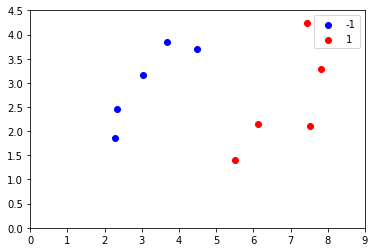

In [0]:
from matplotlib import pyplot as plt

plt.scatter(df[df['Y']==-1]['X1'], df[df['Y']==-1]['X2'], c='b', label='-1')
plt.scatter(df[df['Y']==1]['X1'], df[df['Y']==1]['X2'], c='r', label='1')
plt.xlim(0, 9)
plt.ylim(0, 4.5)
plt.legend()
plt.show()

## 27.2 Treinando SVM com gradiente descendente

### 27.2.1 Modelo de SVM linear

* O modelo de SVM linear é uma linha onde o objetivo do algoritmo é encontrar os melhores valores de coeficientes que separam as classes;

$b_0 + (b_1 \times x_1) + (b_2 \times x_2) = 0$

> Onde $b_0$, $b_1$ e $b_2$ são os coeficientes, $x_1$ e $x_2$ as variáveis de entrada. Essa será a forma da equação que será usada com uma pequena mudança, retiramos o termo de viés ($b_0 = 0$), também chamado *bias* ou *offset* ou *intercept*.  

$(b_1 \times x_1) + (b_2 \times x_2) = 0$

* Isso significa que a linha irá passar na origem ($x_1 = 0$ e $x_2 = 0$). Isso é para deixar o tutorial fácil de ser seguido e porque o exemplo é simples e não precisa disso, podendo ser adicionado se quiser.

### 27.2.2 Método de otimização do SVM

* O algoritmo de otimização para encontrar o coeficiente pode ser fixado como um problema quadrático. Isso é um tipo de otimização restrita onde soluções rápidas podem ser emplementadas (não usaremos esse modelo no tutorial). Outra forma que pode ser usada para descobrir os valores de coeficiente para o SVM linear é o **sub-gradiente descedente**;

* Nesse método um padrão de treinamento aleatório é selecionado cada interação e usado para atualizar os coeficientes. Depois de um grande número de iterações (dezenas ou centenas de dezenas) o algoritmo vai resolver com um grupo estável de coeficientes. A atualização da equação de atualização dos coeficientes funciona assim:

1. Primeiro um valor de saída é calculado por: $output = y \times ((b_1 \times x_1) + (b_2 \times x_2))$
> Dois procedimentos diferentes de atualização são usados dependendo do valor de saída. 

2. Se o **valor for > 1** isso sugere que o padrão de treinamento **não foi um vetor de suporte** (isso significa que a instância não foi diretamente envolvida no cálculo do valor de saída) que no caso os pesos são levemente diminuidos por:
$b = (1 - \frac{1}{t}) \times b$
> Onde $b$ é o peso que está sendo atualizado (como $b_1$ ou $b_2$), $t$ é a interação corrente (ex.: 1 para a primeira atualização, 2 para a segunda e assim por seguinte).

2. Se o **valor de saída for < 1** então é assumido que a instância de treino é um vetor de suporte e deve ser atualizado para explicar melhor os dados:
$b = (1 - \frac{1}{t}) \times b + \frac{1}{lambda \times t} \times (y \times x)$
> Onde $b$ é o peso que está sendo atualizado, $t$ é a interação corrente e $lambda$ é o parâmetro para o algoritmo de aprendizado. O $lambda$ é o parâmetro de aprendizado e é frequentemente escolhido com um valor bem baixo como 0.0001 or menor. 

3. O procedimento é repetido até a taxa de erro cair até um valor desejável ou para um grande número fixo de iterações. 
> Valores baixos de taxa de aprendizado frequentemente necessitam  de grande tempo de treinamento, o número de iterações é a desvantagem desse algoritmo.

## 27.3 Modelo de SVM aprendendo com os dados de treino

* Aqui vamos trabalhar com algumas atualizações nos coeficientes para demonstrar o algoritmo de SVM;

* Usaremos um $lambda$ alto ($lambda = 0.45$), o que é estranho já que se usa valores muito pequenos, para demonstrar grandes mudanças na atualização.

* Inicializamos os coeficientes zerados;

* Preciamos acompanhar a iteração ($t = 1$). Vamos treinar o modelo usando a ordem dos padrões do treino. Idealmente, a ordem dos padrões deveria ser aleatória para evitart que o algoritm pare;

* O primeiro padrão que usaremos para atualizar é o índice 0 do `df`

In [0]:
lamb = 0.45
b1 = 0
b2 = 0
t = 1
df.iloc[[0]]

,X1,X2,Y
0,2.327868,2.458017,-1


* Podemos calcular o valor de saída para essa iteração:

In [0]:
indice = df.iloc[[0]].values
y = indice[0][2]
x1 = indice[0][0]
x2 = indice[0][1]
output = y * ((b1 * x1) + (b2 * x2))
output

-0.0

* A saída é < 1, então vamos utilizar a atualização mais complexa que assume que o padrão de treinamento é um vetor de suporte:

In [0]:
b = output
b1 = (1 - 1/t) * b + (1/lamb*t) * (y * x1)
b2 = (1 - 1/t) * b + (1/lamb*t) * (y * x2)
b1, b2

(-5.173040124444444, -5.462258944444445)

* Atualizamos os coeficientes que usaremos na próxima iteração ($t = 2$) do algoritmo com a segunda instância dos dados de treinamento (indice 1);

* Vamos repetir o processo:

In [0]:
t = 2
indice = df.iloc[[1]].values
y = indice[0][2]
x1 = indice[0][0]
x2 = indice[0][1]
output = y * ((b1 * x1) + (b2 * x2))
output

33.00852224058554

* A saída é > 1, sugerindo que a instância do treino não é um vetor de suporte. Atualizamos os coeficientes do modo mais simples:


In [0]:
b = output
b1 = (1 - 1/t) * b1
b2 = (1 - 1/t) * b2
b1, b2

(-2.586520062222222, -2.7311294722222224)

### 27.3.3 Mais iterações

* Repitir o processo para o resto dos dados. Uma passagem pelos dados é chamado *epoch*. Agora repetiremos o processo por 15 *epochs* para um total de 160 iterações (16 *epochs* x 10 atualizações por *epoch*);

* É possível ficar ciente da perda ou da acurácia do modelo para cada *epoch*. Isso é uma ótima forma de entender quando o algoritmo está convergindo ou quando há um bug na implementação. Se criarmos o gráfico para a acurácia do modelo no fim de cada *epoch*, poderiamos ver algo como:

![acc](acc.png)

* Você verá que depois de 16 *epochs* que teremos uma acurácia de 100% nos dados de treino. Os valores de coeficientes deveriam ser:

$b_1 = 0.552391765$ e $b_2 = -0.724533592$

* A forma do hiperplano aprendido é: $0 + (0.552391765 \times x_1) + (-0.724533592 \times x_2) = 0$

## 27.4 Fazendo predições com o modelo de SVM

* Agora que temos os coeficientes da linha, podemos fazer predições. Faremos predições para dados de treino, mas poderia ser adaptado para dados de teste (dados novos):



In [0]:
def pred(x1, x2):
  b1 = 0.52391765
  b2 = -0.724533592
  output = (b1 * x1) + (b2 * x2)
  return output

df['output'] = df.apply(lambda x: pred(x['X1'], x['X2']), axis=1)
df['crisp'] = df['output'].apply(lambda x: -1 if x < 0 else 1)
df

,X1,X2,Y,output,crisp
0,2.327868,2.458017,-1,-0.561304,-1
1,3.032830,3.170770,-1,-0.708376,-1
2,4.485465,3.696728,-1,-0.328389,-1
3,3.684815,3.846847,-1,-0.856630,-1
4,2.283559,1.853216,-1,-0.146321,-1
5,7.807521,3.290132,1,1.706687,1
6,6.132998,2.140563,1,1.662276,1
7,7.514829,2.107057,1,2.410518,1
8,5.502385,1.404003,1,1.865550,1
9,7.432932,4.236233,1,0.824952,1


* Comparando a coluna `crisp` com a coluna `Y` podemos ver que o modelo teve 100% de acurácia nos dados de treinamento.

# [Machine Learning Tutorial Python - 10 Support Vector Machine (SVM)](https://www.youtube.com/watch?v=FB5EdxAGxQg)

In [0]:
import pandas as pd
from sklearn.datasets import load_iris
from matplotlib import pyplot as plt
%matplotlib inline

In [0]:
iris = load_iris()
df = pd.DataFrame(iris.data, columns=iris.feature_names)
df['target'] = iris.target
df['flower_name'] = df.target.apply(lambda x: iris.target_names[x])
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target,flower_name
0,5.1,3.5,1.4,0.2,0,setosa
1,4.9,3.0,1.4,0.2,0,setosa
2,4.7,3.2,1.3,0.2,0,setosa
3,4.6,3.1,1.5,0.2,0,setosa
4,5.0,3.6,1.4,0.2,0,setosa


In [0]:
df0 = df[df.target == 0]
df1 = df[df.target == 1]
df2 = df[df.target == 2]
df1.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target,flower_name
50,7.0,3.2,4.7,1.4,1,versicolor
51,6.4,3.2,4.5,1.5,1,versicolor
52,6.9,3.1,4.9,1.5,1,versicolor
53,5.5,2.3,4.0,1.3,1,versicolor
54,6.5,2.8,4.6,1.5,1,versicolor


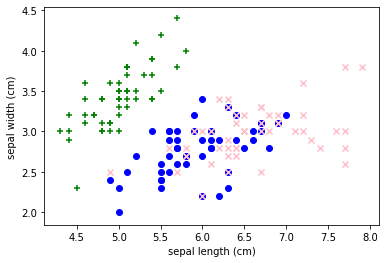

In [0]:
plt.xlabel('sepal length (cm)')
plt.ylabel('sepal width (cm)')
plt.scatter(df0['sepal length (cm)'], df0['sepal width (cm)'], color='green', marker='+')
plt.scatter(df1['sepal length (cm)'], df1['sepal width (cm)'], color='blue', marker='o')
plt.scatter(df2['sepal length (cm)'], df2['sepal width (cm)'], color='pink', marker='x')

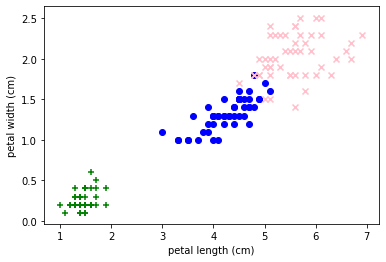

In [0]:
plt.xlabel('petal length (cm)')
plt.ylabel('petal width (cm)')
plt.scatter(df0['petal length (cm)'], df0['petal width (cm)'], color='green', marker='+')
plt.scatter(df1['petal length (cm)'], df1['petal width (cm)'], color='blue', marker='o')
plt.scatter(df2['petal length (cm)'], df2['petal width (cm)'], color='pink', marker='x')

In [0]:
from sklearn.model_selection import train_test_split

In [0]:
X_train, X_test, y_train, y_test = train_test_split(iris.data, iris.target, test_size=0.2)
X_train.shape, X_test.shape

((120, 4), (30, 4))

In [0]:
from sklearn.svm import SVC

svm = SVC(gamma='auto').fit(X_train, y_train)

In [0]:
svm.score(X_test, y_test)

1.0

## Referencias

1. [Machine Learning Tutorial Python - 10 Support Vector Machine (SVM)](https://www.youtube.com/watch?v=FB5EdxAGxQg)
2. [Support Vector Machines - The Math of Intelligence (Week 1)](https://www.youtube.com/watch?v=g8D5YL6cOSE)
3. [Lecture 67 — Support Vector Machines - Introduction | Stanford University](https://www.youtube.com/watch?v=v7H5ks5iDEQ)
4. [Lecture 68 — Support Vector Machines Mathematical Formulation | Stanford](https://www.youtube.com/watch?v=ax8LxRZCORU&t=1s)
5. [Lecture 12.1 — Support Vector Machines | Optimization Objective — [ Machine Learning | Andrew Ng]](https://www.youtube.com/watch?v=hCOIMkcsm_g&list=PLLssT5z_DsK-h9vYZkQkYNWcItqhlRJLN&index=70)